In [75]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/zomato-dataset/zomato.csv


In [76]:
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [77]:
#importing the dataset
data = pd.read_csv('/kaggle/input/zomato-dataset/zomato.csv')

In [78]:

#basic info about data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [79]:
data

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51712,https://www.zomato.com/bangalore/best-brews-fo...,"Four Points by Sheraton Bengaluru, 43/3, White...",Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6 /5,27,080 40301477,Whitefield,Bar,NaN,Continental,"1,500","[('Rated 5.0', ""RATED\n Food and service are ...",[],Pubs and bars,Whitefield
51713,https://www.zomato.com/bangalore/vinod-bar-and...,"Number 10, Garudachar Palya, Mahadevapura, Whi...",Vinod Bar And Restaurant,No,No,NaN,0,+91 8197675843,Whitefield,Bar,NaN,Finger Food,600,[],[],Pubs and bars,Whitefield
51714,https://www.zomato.com/bangalore/plunge-sherat...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,NaN,0,NaN,Whitefield,Bar,NaN,Finger Food,"2,000",[],[],Pubs and bars,Whitefield
51715,https://www.zomato.com/bangalore/chime-sherato...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3 /5,236,080 49652769,"ITPL Main Road, Whitefield",Bar,"Cocktails, Pizza, Buttermilk",Finger Food,"2,500","[('Rated 4.0', 'RATED\n Nice and friendly pla...",[],Pubs and bars,Whitefield


In [80]:
data.shape

(51717, 17)

In [81]:
data.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

# > **Cleaning the Data**

In [82]:
#we find that some column are not of our use during data analysis
#so we remove such columns
data.drop(['url', 'address','phone', 'dish_liked', 'cuisines', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'], axis=1,inplace=True)

In [83]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         51717 non-null  object
 1   online_order                 51717 non-null  object
 2   book_table                   51717 non-null  object
 3   rate                         43942 non-null  object
 4   votes                        51717 non-null  int64 
 5   location                     51696 non-null  object
 6   rest_type                    51490 non-null  object
 7   approx_cost(for two people)  51371 non-null  object
dtypes: int64(1), object(7)
memory usage: 3.2+ MB


In [84]:
#checking for the duplicate values"
data[data.duplicated()].columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes', 'location',
       'rest_type', 'approx_cost(for two people)'],
      dtype='object')

In [85]:
#deleting the duplicate data
data=data.drop_duplicates()

In [86]:
data.shape
data.describe(include= 'all')

,name,online_order,book_table,rate,votes,location,rest_type,approx_cost(for two people)
count,22861,22861,22861,20161,22861.000000,22850,22762,22718
unique,8792,2,2,64,NaN,93,93,70
top,Cafe Coffee Day,Yes,No,3.9/5,NaN,BTM,Quick Bites,300
freq,65,13551,19874,946,NaN,1762,8308,3169
mean,NaN,NaN,NaN,NaN,325.796509,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,868.301433,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,9.000000,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,50.000000,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,237.000000,NaN,NaN,NaN


In [87]:
#checking for the null values
data.isnull().sum()

name                              0
online_order                      0
book_table                        0
rate                           2700
votes                             0
location                         11
rest_type                        99
approx_cost(for two people)     143
dtype: int64

In [88]:
#deleting the null entries
data=data.dropna()

In [89]:
data.isnull().sum()

name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
location                       0
rest_type                      0
approx_cost(for two people)    0
dtype: int64

In [90]:
#renaming the columns
rename_cols={"approx_cost(for two people)":"cost"}
data.rename(inplace=True, columns=rename_cols)

In [91]:
data

,name,online_order,book_table,rate,votes,location,rest_type,cost
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,800
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,800
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining",800
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,300
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,600
...,...,...,...,...,...,...,...,...
51624,SLV Grand,Yes,No,3.3 /5,66,"ITPL Main Road, Whitefield",Quick Bites,300
51628,Nook - Aloft Bengaluru Cessna Business Park,No,Yes,4.2 /5,411,Bellandur,Casual Dining,"1,800"
51631,Just Parathas,No,No,3.4 /5,5,Brookefield,Quick Bites,250
51632,SeeYa Restaurant,No,No,3.3 /5,4,KR Puram,Quick Bites,350


# Exploring the dataset

In [92]:
#we start to analyse with rate column

In [93]:
data['rate'].unique()


array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [94]:
# Defining a function to that can remove the invalid values from the rate column and also covert them from string to integer form
def exploring_rates(value):
    if (value == 'NEW' or value == '-'):
        return np.nan                   
    
    else :
        value = str(value).split('/')                                       
        value = value[0]                                                                                       
        return float(value)                           
        
        
# Now applying the function on "rate" column        

data.rate = data['rate'].apply(exploring_rates)
    

In [95]:
data['rate'].unique()

array([4.1, 3.8, 3.7, 3.6, 4.6, 4. , 4.2, 3.9, 3.1, 3. , 3.2, 3.3, 2.8,
       4.4, 4.3, nan, 2.9, 3.5, 2.6, 3.4, 4.5, 2.5, 2.7, 4.7, 2.4, 2.2,
       2.3, 4.8, 4.9, 2.1, 2. , 1.8])

In [96]:
#calculating the avg value that is to be placed in place of nan values

avg=round(np.nanmean(data['rate']) ,ndigits=1)
data['rate']=data['rate'].fillna(avg)


In [97]:
#checking for the unique data present in the rate column
data['rate'].unique()

array([4.1, 3.8, 3.7, 3.6, 4.6, 4. , 4.2, 3.9, 3.1, 3. , 3.2, 3.3, 2.8,
       4.4, 4.3, 2.9, 3.5, 2.6, 3.4, 4.5, 2.5, 2.7, 4.7, 2.4, 2.2, 2.3,
       4.8, 4.9, 2.1, 2. , 1.8])

In [98]:
 #checking for the null valure
    data.isnull().sum()


name            0
online_order    0
book_table      0
rate            0
votes           0
location        0
rest_type       0
cost            0
dtype: int64

In [99]:
#analysing Restaurant type 
rest_type=data['rest_type'].value_counts()
rest_type

Quick Bites                   6942
Casual Dining                 4602
Cafe                          1220
Delivery                      1071
Takeaway, Delivery             898
                              ... 
Food Court, Beverage Shop        2
Bhojanalya                       2
Cafe, Food Court                 1
Quick Bites, Kiosk               1
Dessert Parlor, Food Court       1
Name: rest_type, Length: 87, dtype: int64

In [100]:
#defining a new variable that has number of restaurants less than 700
other_resto_types = rest_type[rest_type <700]
other_resto_types


Casual Dining, Bar            451
Beverage Shop                 370
Bakery                        363
Food Court                    251
Fine Dining                   208
                             ... 
Food Court, Beverage Shop       2
Bhojanalya                      2
Cafe, Food Court                1
Quick Bites, Kiosk              1
Dessert Parlor, Food Court      1
Name: rest_type, Length: 81, dtype: int64

In [101]:
# Defining function



def handle_rest_type(type):
    if (type in other_resto_types):
        return 'other_resto_types'
    
    else:
        return type
    
data['rest_type'] = data['rest_type'].apply(handle_rest_type)

In [102]:
#no of restaurant of different kinds
data['rest_type'].value_counts()

Quick Bites           6942
Casual Dining         4602
other_resto_types     4369
Cafe                  1220
Delivery              1071
Takeaway, Delivery     898
Dessert Parlor         891
Name: rest_type, dtype: int64

In [103]:
data

,name,online_order,book_table,rate,votes,location,rest_type,cost
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,800
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,800
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,other_resto_types,800
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,300
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,600
...,...,...,...,...,...,...,...,...
51624,SLV Grand,Yes,No,3.3,66,"ITPL Main Road, Whitefield",Quick Bites,300
51628,Nook - Aloft Bengaluru Cessna Business Park,No,Yes,4.2,411,Bellandur,Casual Dining,"1,800"
51631,Just Parathas,No,No,3.4,5,Brookefield,Quick Bites,250
51632,SeeYa Restaurant,No,No,3.3,4,KR Puram,Quick Bites,350


In [104]:
#working on the locations , exploring them

data['location'].unique()

array(['Banashankari', 'Basavanagudi', 'Mysore Road', 'Jayanagar',
       'Kumaraswamy Layout', 'Rajarajeshwari Nagar', 'Vijay Nagar',
       'Uttarahalli', 'JP Nagar', 'South Bangalore', 'City Market',
       'Bannerghatta Road', 'BTM', 'Kanakapura Road', 'Bommanahalli',
       'CV Raman Nagar', 'Electronic City', 'Wilson Garden',
       'Shanti Nagar', 'Koramangala 5th Block', 'Richmond Road', 'HSR',
       'Marathahalli', 'Koramangala 7th Block', 'Bellandur',
       'Sarjapur Road', 'Whitefield', 'East Bangalore',
       'Old Airport Road', 'Indiranagar', 'Koramangala 1st Block',
       'Frazer Town', 'MG Road', 'Brigade Road', 'Lavelle Road',
       'Church Street', 'Ulsoor', 'Residency Road', 'Shivajinagar',
       'Infantry Road', 'St. Marks Road', 'Cunningham Road',
       'Race Course Road', 'Commercial Street', 'Vasanth Nagar', 'Domlur',
       'Koramangala 8th Block', 'Ejipura', 'Jeevan Bhima Nagar',
       'Old Madras Road', 'Seshadripuram', 'Kammanahalli',
       'Koramanga

In [105]:
#counting the nuber of restaurants at different location
data['location'].value_counts()

BTM                      1563
HSR                      1115
Whitefield               1048
Indiranagar              1047
Koramangala 5th Block     964
                         ... 
Kengeri                     2
Rajarajeshwari Nagar        2
Yelahanka                   2
Nagarbhavi                  1
Peenya                      1
Name: location, Length: 92, dtype: int64

In [106]:
#working on cost

data['cost'].unique()


array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '1,700', '1,400', '1,350', '2,200', '2,000',
       '1,800', '1,900', '180', '330', '2,500', '2,100', '3,000', '2,800',
       '3,400', '50', '40', '1,250', '3,500', '4,000', '2,400', '2,600',
       '1,450', '70', '3,200', '560', '240', '360', '6,000', '1,050',
       '2,300', '4,100', '120', '5,000', '3,700', '1,650', '2,700',
       '4,500'], dtype=object)

In [107]:
#removing commas in the cost data in order to convert it in int form string 
# Writing functing to remove "," and convert this column into float

def removing_commas(cost):
    cost = str(cost)
    if "," in cost:
        cost = cost.replace("," , "")           
        # we simply replaced coma with empty value
        return float(cost)                      
    # converting data type into float
    else:
        return float(cost)
    
# applying the funcntion on our cost
data['cost'] =data['cost'].apply(removing_commas)

In [108]:
#converted datatype of cost
data['cost'].describe()

count    19993.000000
mean       589.767819
std        470.615762
min         40.000000
25%        300.000000
50%        450.000000
75%        700.000000
max       6000.000000
Name: cost, dtype: float64

In [109]:
#as this cost was given for 2 people but cost per person witll be more
#effective for our analysis so divinding every cost by 2
data['cost']=data['cost']/2


In [110]:
data['cost'].describe()

count    19993.000000
mean       294.883909
std        235.307881
min         20.000000
25%        150.000000
50%        225.000000
75%        350.000000
max       3000.000000
Name: cost, dtype: float64

In [111]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19993 entries, 0 to 51677
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          19993 non-null  object 
 1   online_order  19993 non-null  object 
 2   book_table    19993 non-null  object 
 3   rate          19993 non-null  float64
 4   votes         19993 non-null  int64  
 5   location      19993 non-null  object 
 6   rest_type     19993 non-null  object 
 7   cost          19993 non-null  float64
dtypes: float64(2), int64(1), object(5)
memory usage: 1.4+ MB


In [112]:
#exploring  votes
data['votes'].unique()

array([ 775,  787,  918, ..., 4957, 2382,  843])

In [113]:
#exploring book_table
data['book_table'].unique()

array(['Yes', 'No'], dtype=object)

In [114]:
#explore online order
data['online_order'].unique()

array(['Yes', 'No'], dtype=object)

In [115]:
data

,name,online_order,book_table,rate,votes,location,rest_type,cost
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,400.0
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,400.0
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,other_resto_types,400.0
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,150.0
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,300.0
...,...,...,...,...,...,...,...,...
51624,SLV Grand,Yes,No,3.3,66,"ITPL Main Road, Whitefield",Quick Bites,150.0
51628,Nook - Aloft Bengaluru Cessna Business Park,No,Yes,4.2,411,Bellandur,Casual Dining,900.0
51631,Just Parathas,No,No,3.4,5,Brookefield,Quick Bites,125.0
51632,SeeYa Restaurant,No,No,3.3,4,KR Puram,Quick Bites,175.0


In [116]:
#visualzing on the basis of online_order
x=data['online_order'].value_counts()
x

Yes    12863
No      7130
Name: online_order, dtype: int64

/tmp/ipykernel_32/4265624767.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


([<matplotlib.patches.Wedge at 0x79cbe0ab80a0>,
 [Text(-0.47888433431931754, 0.9902877331076783, 'Yes'),
  Text(0.478884241601886, -0.9902877779440614, 'No')],
 [Text(-0.2612096369014459, 0.5401569453314607, '64.34'),
  Text(0.2612095863283014, -0.5401569697876698, '35.66')])

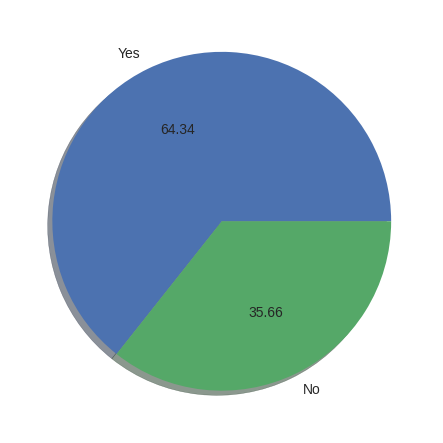

In [117]:
plt.style.use('seaborn')
plt.pie(x,labels=x.index,autopct='%.2f',shadow=True)


In [118]:
#visualizing location wise restaurant
loc_wise = data.groupby(['online_order','location'])['name'].count()

In [119]:
loc_wise.to_csv('loc_wisee.csv')
loc_wise = pd.read_csv('loc_wisee.csv')
loc_wise= pd.pivot_table(loc_wise, values=None, index='location', columns='online_order')
#,fill_value=0, aggfunc= np.sum

In [120]:
loc_wise


name        
online_order          No     Yes
location                        
BTM                409.0  1154.0
Banashankari       136.0   181.0
Banaswadi          109.0   143.0
Bannerghatta Road  186.0   395.0
Basavanagudi       134.0   195.0
...                  ...     ...
West Bangalore       2.0     2.0
Whitefield         394.0   654.0
Wilson Garden       41.0    36.0
Yelahanka            NaN     2.0
Yeshwantpur         14.0    57.0

[92 rows x 2 columns]

Text(0, 0.5, 'no of restaurants')

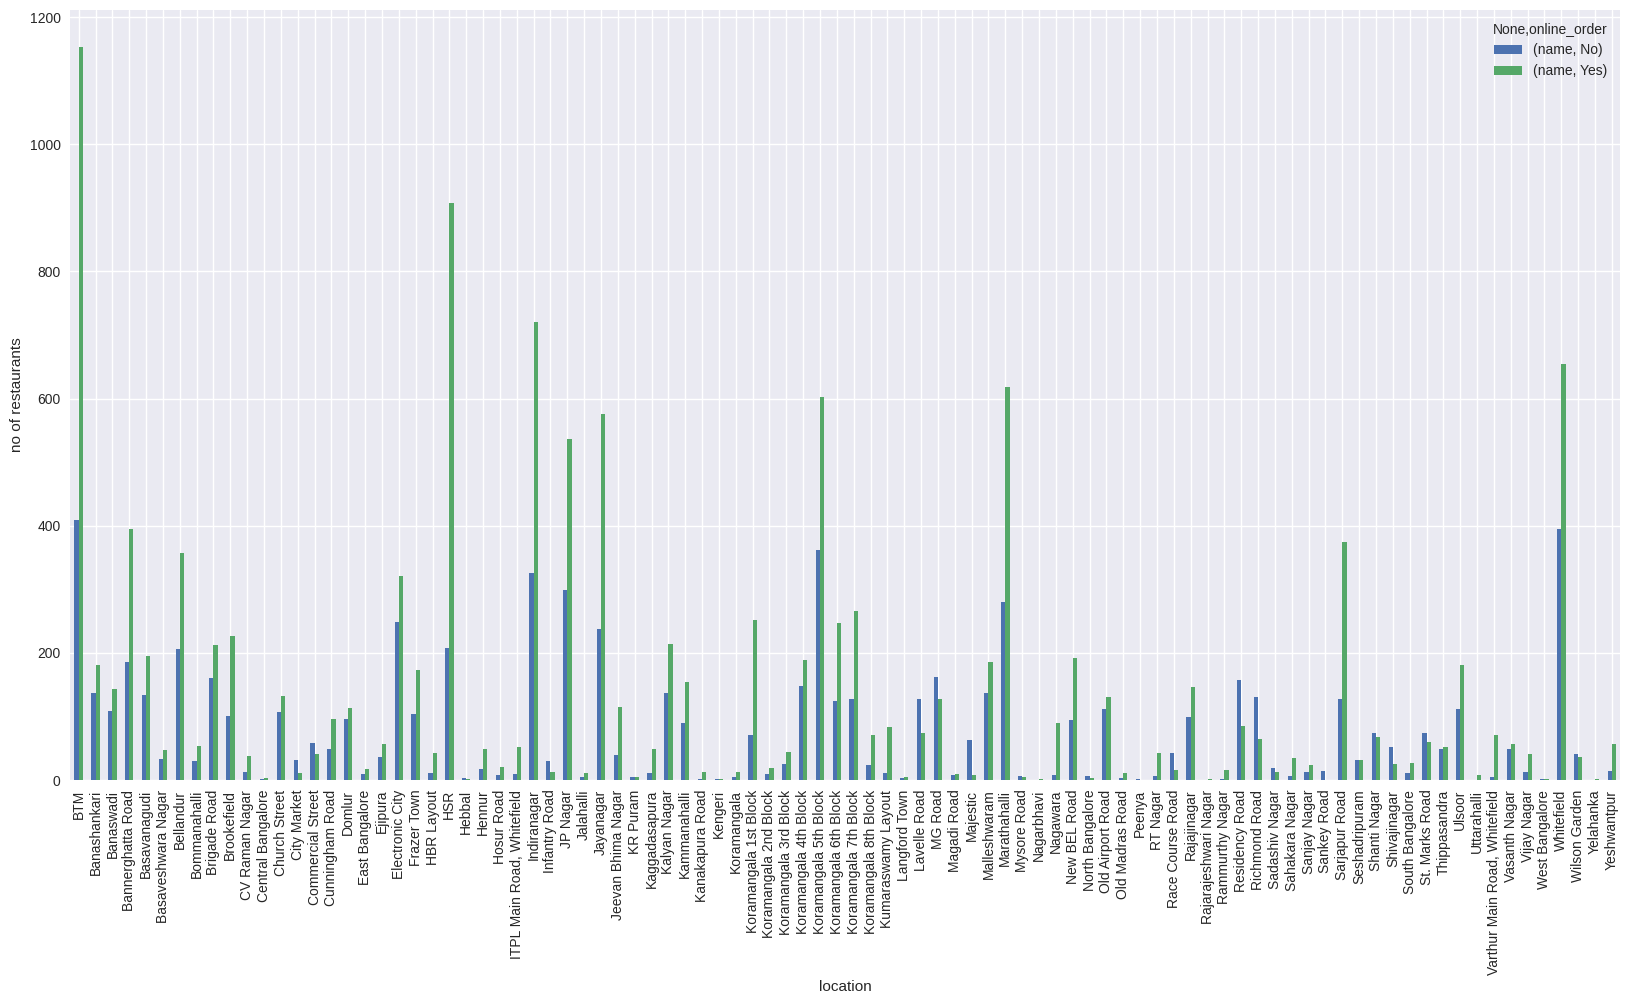

In [121]:
# ploting bar plot for visualization

 
loc_wise.plot(kind = 'bar', figsize=(20,10))
plt.ylabel('no of restaurants')


In [122]:
#checking popularity of the lcoation on the basis of votes
loc_votes = data[['votes','location']]

In [123]:
# Dropping duplicate values
loc_votes.drop_duplicates()

,votes,location
0,775,Banashankari
1,787,Banashankari
2,918,Banashankari
3,88,Banashankari
4,166,Basavanagudi
...,...,...
51620,182,"ITPL Main Road, Whitefield"
51624,66,"ITPL Main Road, Whitefield"
51628,411,Bellandur
51632,4,KR Puram


In [124]:
#adding up votes for particular location
loc_votes2=loc_votes.groupby(['location'])['votes'].sum()       
loc_votes2=loc_votes2.to_frame()


In [125]:
#  sorting the locations such that maximum no votes are on top
loc_votes2=loc_votes2.sort_values('votes',ascending=False)
loc_votes2

,votes
location,
Koramangala 5th Block,1154180
Indiranagar,693469
Koramangala 4th Block,303114
JP Nagar,301070
Jayanagar,299753
...,...
Hebbal,225
Kengeri,118
Yelahanka,88


/tmp/ipykernel_32/581605866.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


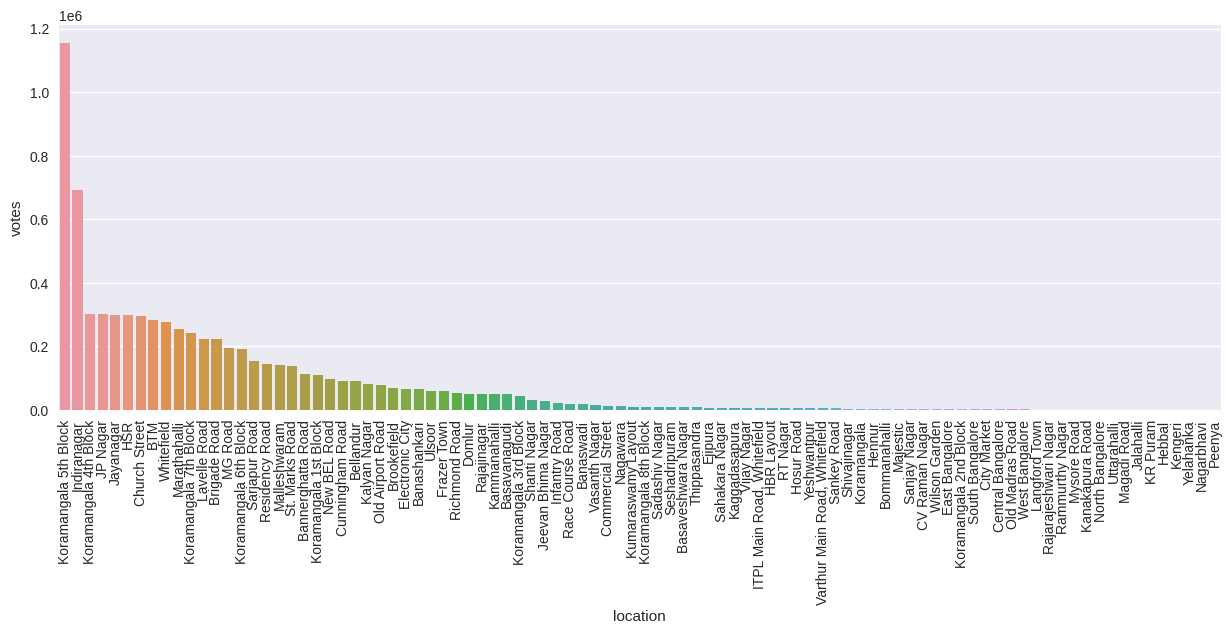

In [126]:
#ploting the bar plot of above table for better visualization
plt.figure(figsize= (15,5))
plt.style.use('seaborn')
sns.barplot(x= loc_votes2.index,y= loc_votes2['votes'] )
plt.xticks(rotation=90) 
plt.show()

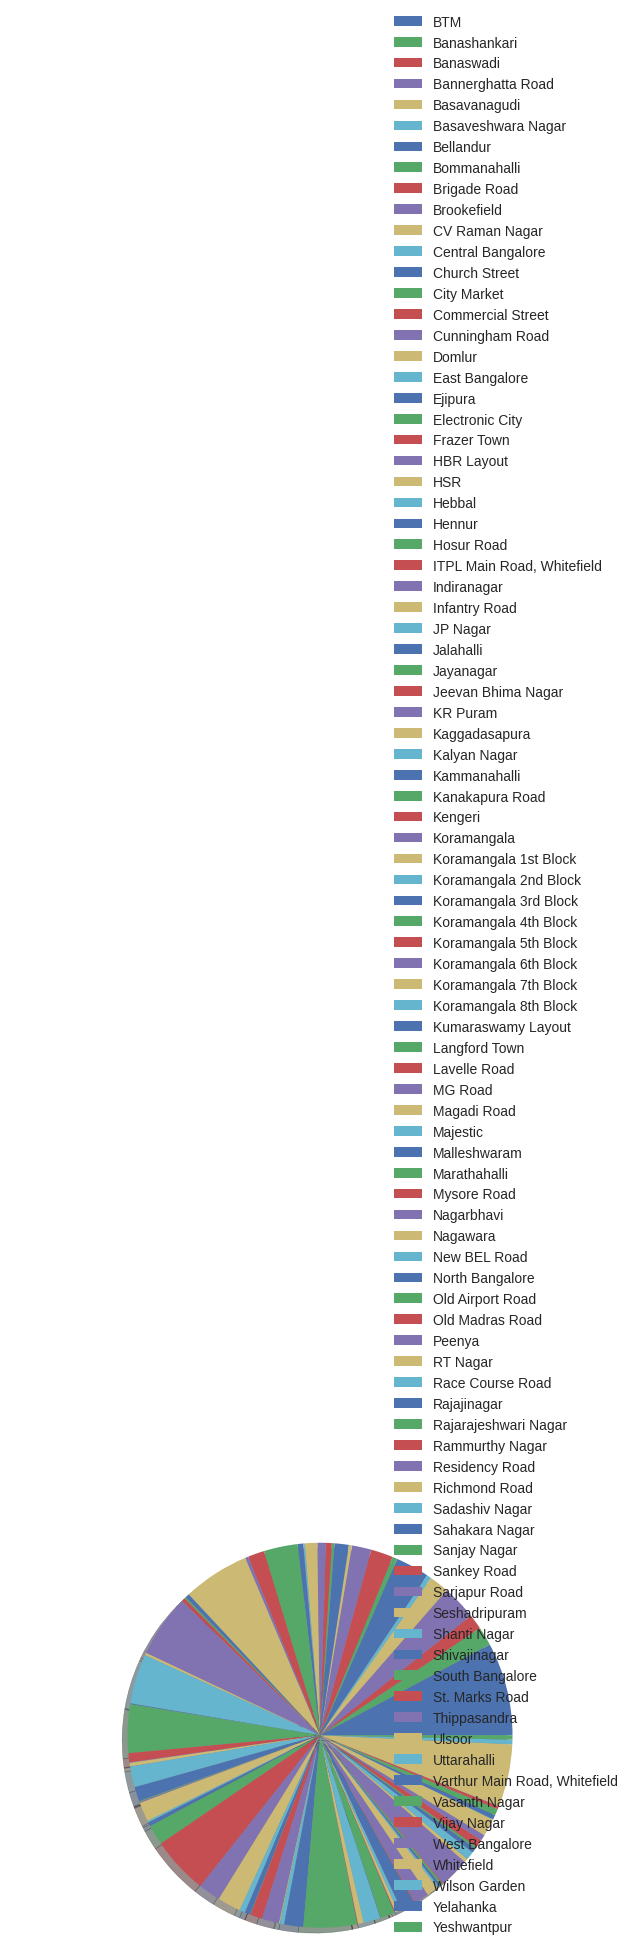

In [127]:
p=data.groupby(['location'])['name'].count()
patches, texts = plt.pie(p.values, shadow=True)
plt.legend(patches,p.index, loc='lower right')
plt.axis('equal')

plt.show()

In [128]:
#tasks to be done
#Here is the list of features that need to be analysed as a part of this project
#Restaurants that are providing online delivery vs the ones which are not
#Ratings of Restaurants with online booking and without online booking
#How location affects the ratings of the bookings
#Types of restaurants based on location
#Cost of restaurants based on location
#Ranking of most popular restaurant types
data


,name,online_order,book_table,rate,votes,location,rest_type,cost
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,400.0
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,400.0
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,other_resto_types,400.0
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,150.0
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,300.0
...,...,...,...,...,...,...,...,...
51624,SLV Grand,Yes,No,3.3,66,"ITPL Main Road, Whitefield",Quick Bites,150.0
51628,Nook - Aloft Bengaluru Cessna Business Park,No,Yes,4.2,411,Bellandur,Casual Dining,900.0
51631,Just Parathas,No,No,3.4,5,Brookefield,Quick Bites,125.0
51632,SeeYa Restaurant,No,No,3.3,4,KR Puram,Quick Bites,175.0


/tmp/ipykernel_32/402703783.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


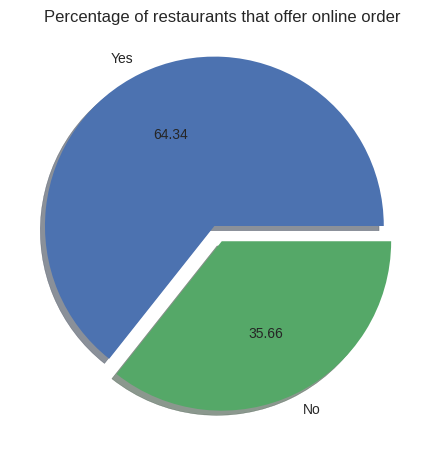

In [129]:
#Restaurants that are providing online delivery vs the ones which are not
#visualzing on the basis of online_order
x=data['online_order'].value_counts()
x
plt.style.use('seaborn')
plt.pie(x,labels=x.index,autopct='%.2f',shadow=True,explode=[0.1,0])
plt.title('Percentage of restaurants that offer online order');

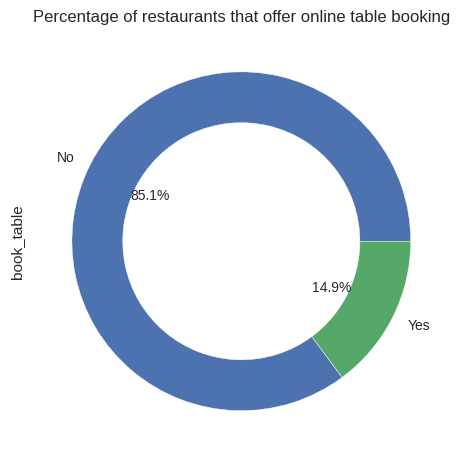

In [130]:
data["book_table"].value_counts().plot(kind="pie", autopct="%1.1f%%", wedgeprops=dict(width=.3, edgecolor='w'))
plt.title('Percentage of restaurants that offer online table booking');

In [131]:
#Ratings of Restaurants with online booking and without online booking

rating_booking = data[['rate','book_table']]
rating_booking

,rate,book_table
0,4.1,Yes
1,4.1,No
2,3.8,No
3,3.7,No
4,3.8,No
...,...,...
51624,3.3,No
51628,4.2,Yes
51631,3.4,No
51632,3.3,No


Text(0.5, 1.0, 'Rating with online booking')

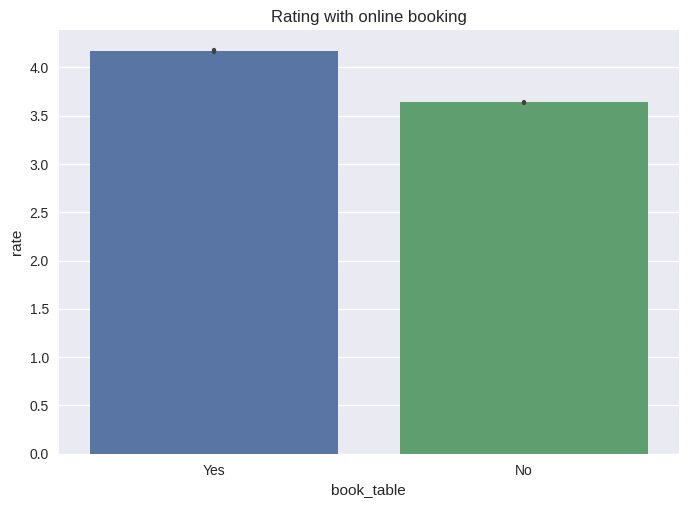

In [132]:
sns.barplot(x=data['book_table'], y=data['rate'])
plt.title('Rating with online booking')

In [133]:
#Ranking of most popular restaurant types
data['cost'].sort_values(ascending=False).head(10)

19139    3000.0
45618    3000.0
40266    2500.0
41591    2250.0
37715    2050.0
6323     2000.0
43298    2000.0
19121    2000.0
40274    2000.0
43348    2000.0
Name: cost, dtype: float64

In [134]:
fn=data[data['cost']>=2000].sort_values(by=['cost'],ascending=False).head(10)


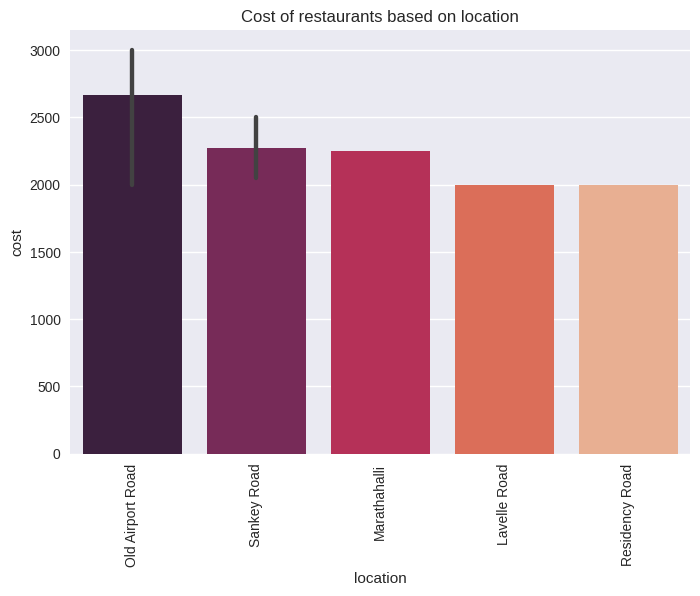

In [135]:
sns.barplot(data=fn,x='location',y='cost',palette="rocket")
plt.xticks(rotation=90)
plt.title('Cost of restaurants based on location')
plt.show()


In [136]:
data

,name,online_order,book_table,rate,votes,location,rest_type,cost
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,400.0
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,400.0
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,other_resto_types,400.0
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,150.0
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,300.0
...,...,...,...,...,...,...,...,...
51624,SLV Grand,Yes,No,3.3,66,"ITPL Main Road, Whitefield",Quick Bites,150.0
51628,Nook - Aloft Bengaluru Cessna Business Park,No,Yes,4.2,411,Bellandur,Casual Dining,900.0
51631,Just Parathas,No,No,3.4,5,Brookefield,Quick Bites,125.0
51632,SeeYa Restaurant,No,No,3.3,4,KR Puram,Quick Bites,175.0


In [141]:
#ranking of most popular restraunt types on basis of votes
rest_rate = data[['rest_type','votes']]
rest_rate=rest_rate.drop_duplicates()
rest_rate


,rest_type,votes
0,Casual Dining,775
1,Casual Dining,787
2,other_resto_types,918
3,Quick Bites,88
4,Casual Dining,166
...,...,...
51089,other_resto_types,1003
51111,other_resto_types,1094
51123,Cafe,843
51207,Casual Dining,276


In [142]:
#adding up votes for particular restaurant type
rest_rate2=rest_rate.groupby(['rest_type'])['votes'].sum()       
rest_rate2=rest_rate2.to_frame()
rest_rate2

,votes
rest_type,
Cafe,534958
Casual Dining,1734720
Delivery,107970
Dessert Parlor,132769
Quick Bites,348944
"Takeaway, Delivery",36998
other_resto_types,2641675


In [143]:
#  sorting the restaurant type such that max votes is on top
rest_rate2=rest_rate2.sort_values('votes',ascending=False)
rest_rate2

,votes
rest_type,
other_resto_types,2641675
Casual Dining,1734720
Cafe,534958
Quick Bites,348944
Dessert Parlor,132769
Delivery,107970
"Takeaway, Delivery",36998


/tmp/ipykernel_32/576330902.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


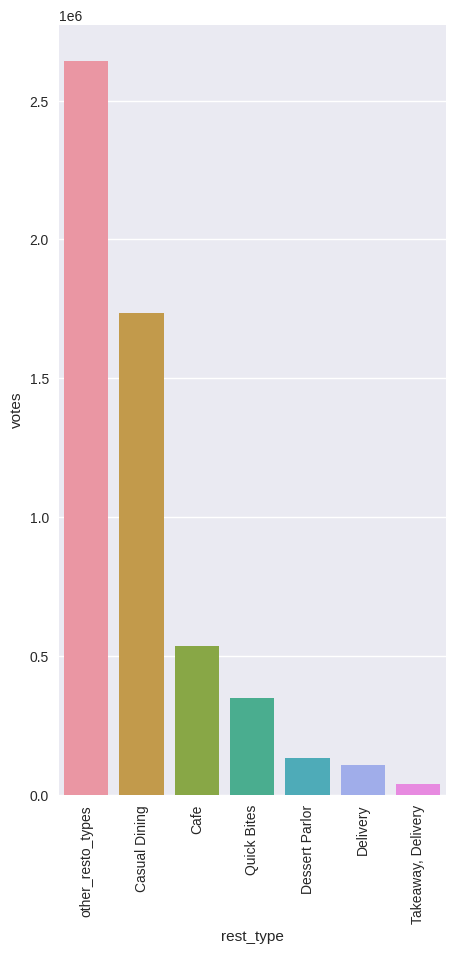

In [144]:
#ploting the bar plot of above table for better visualization
plt.figure(figsize= (5,10))
plt.style.use('seaborn')
sns.barplot(x= rest_rate2.index,y= rest_rate2['votes'] )
plt.xticks(rotation=90) 
plt.show()

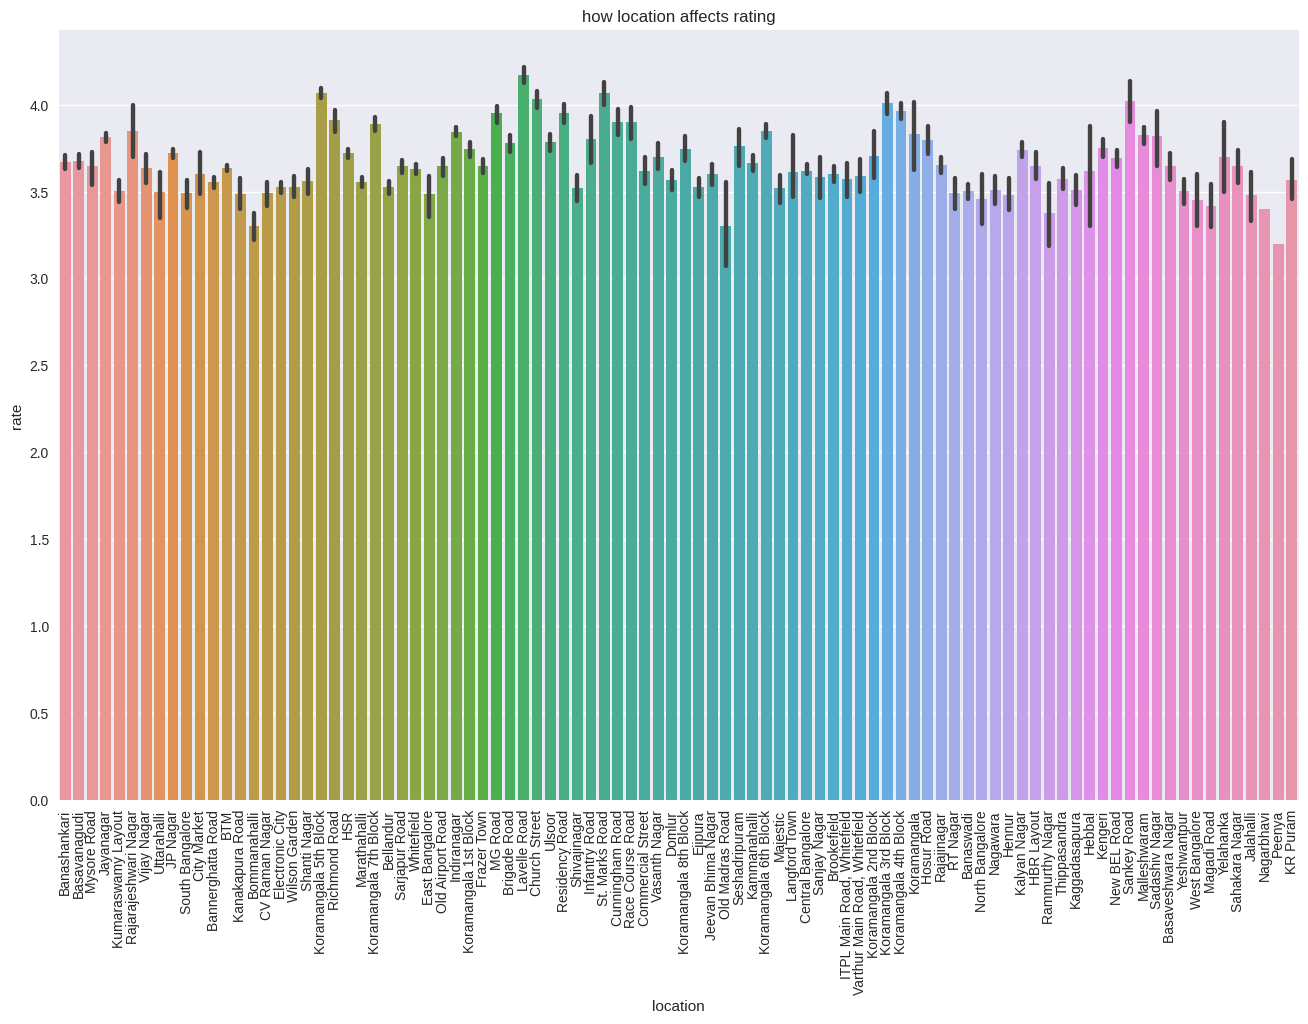

In [145]:
#How location affects the ratings of the bookings
plt.figure(figsize=(16,10))
sns.barplot(x=data['location'], y=data['rate'])
plt.title('how location affects rating')
plt.xticks(rotation=90);

In [146]:
data

,name,online_order,book_table,rate,votes,location,rest_type,cost
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,400.0
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,400.0
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,other_resto_types,400.0
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,150.0
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,300.0
...,...,...,...,...,...,...,...,...
51624,SLV Grand,Yes,No,3.3,66,"ITPL Main Road, Whitefield",Quick Bites,150.0
51628,Nook - Aloft Bengaluru Cessna Business Park,No,Yes,4.2,411,Bellandur,Casual Dining,900.0
51631,Just Parathas,No,No,3.4,5,Brookefield,Quick Bites,125.0
51632,SeeYa Restaurant,No,No,3.3,4,KR Puram,Quick Bites,175.0


In [147]:
#Types of restaurants based on location
rest_loc=data.groupby(['location','rest_type'])['name'].count()
rest_loc

location     rest_type        
BTM          Cafe                  67
             Casual Dining        258
             Delivery              78
             Dessert Parlor        43
             Quick Bites          759
                                 ... 
Yeshwantpur  Casual Dining         14
             Delivery               1
             Dessert Parlor         1
             Quick Bites           40
             other_resto_types     14
Name: name, Length: 487, dtype: int64

In [148]:
#restrurants that have number of outlets less than 700
other_resto_types = rest_type[rest_type <700]
other_resto_types

Casual Dining, Bar            451
Beverage Shop                 370
Bakery                        363
Food Court                    251
Fine Dining                   208
                             ... 
Food Court, Beverage Shop       2
Bhojanalya                      2
Cafe, Food Court                1
Quick Bites, Kiosk              1
Dessert Parlor, Food Court      1
Name: rest_type, Length: 81, dtype: int64

In [149]:
#preparing a table of restaurants types for different location that is to be plotted later
df3 = data.groupby(['location','rest_type'])['name'].count()
df3.to_csv('location_Type.csv')
df3 = pd.read_csv('location_Type.csv')
df3 = pd.pivot_table(df3, values=None, index=['location'], columns=['rest_type'], fill_value=0, aggfunc=np.sum)
df3

name                                                    \
rest_type         Cafe Casual Dining Delivery Dessert Parlor Quick Bites   
location                                                                   
BTM                 67           258       78             43         759   
Banashankari        27            60       11             20         149   
Banaswadi           14            55        3              4         126   
Bannerghatta Road   18           128       30             32         227   
Basavanagudi        12            38        0             24         215   
...                ...           ...      ...            ...         ...   
West Bangalore       0             0        2              0           0   
Whitefield          29           252       92             40         311   
Wilson Garden        1            13        1              0          48   
Yelahanka            0             0        0              0           2   
Yeshwantpur          1            14        1              1          40   

                                                        
rest_type         Takeaway, Delivery other_resto_types  
location                                                
BTM                              132               226  
Banashankari                       9                41  
Banaswadi                          7                43  
Bannerghatta Road                 22               124  
Basavanagudi                       3                37  
...                              ...               ...  
West Bangalore                     1                 1  
Whitefield                        50               274  
Wilson Garden                      2                12  
Yelahanka                          0                 0  
Yeshwantpur                        0                14  

[92 rows x 7 columns]

<Axes: xlabel='location'>

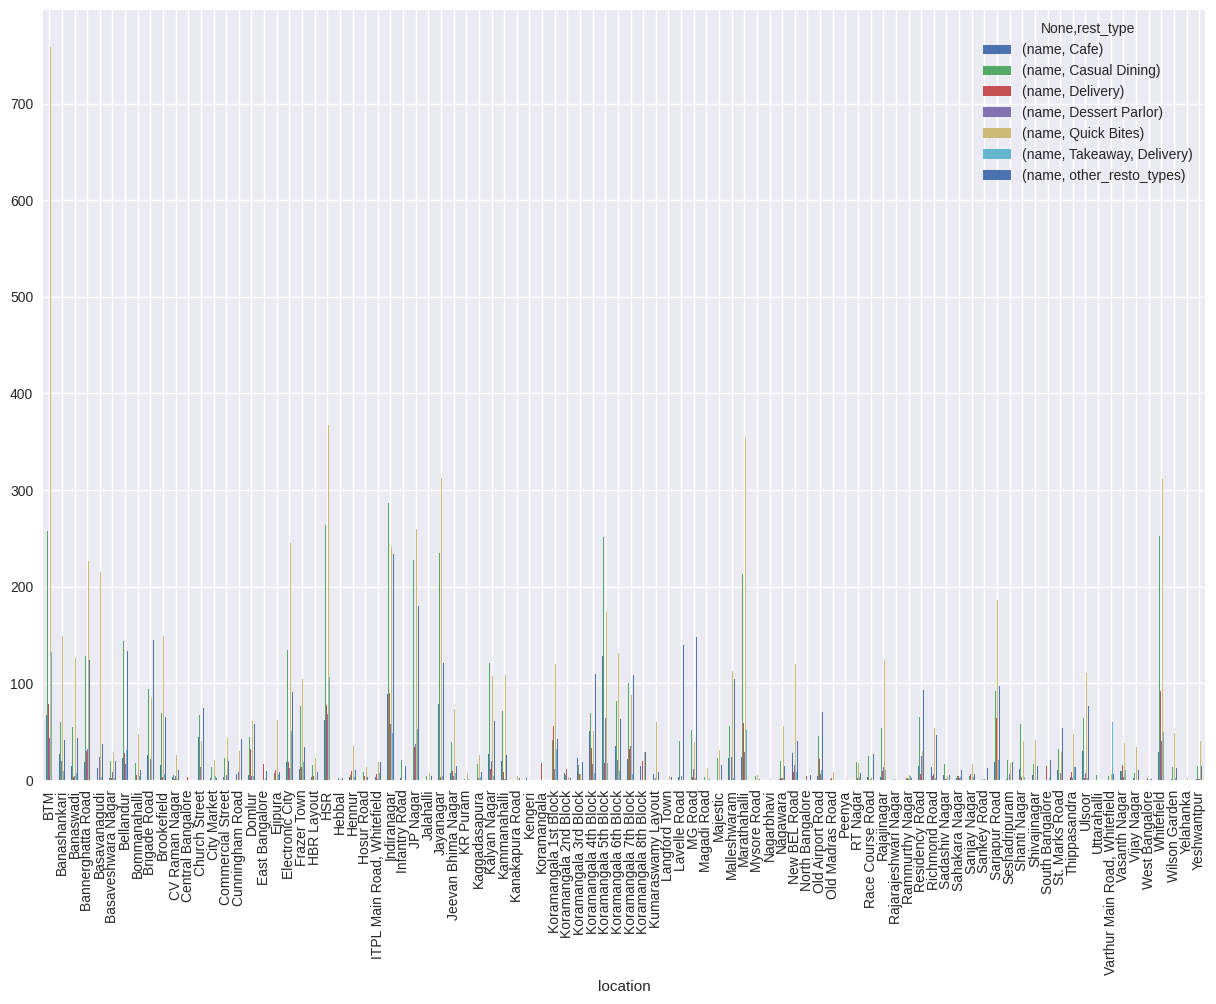

In [153]:
#plotting restaurants types vs location
df3.plot(kind='bar',figsize=(15,10))
